In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pyvis import network as net
import networkx as nx
from utils import input
from utils import score

In [9]:
nodes_input, edges, k = input.read_to_df("input_files/Population_Density_Afro-Eurasia.txt")
node_pos = score.read_to_df("result_files/Population_Density_Afro-Eurasia_score_3418.66.txt")
node_pos.set_index("node", inplace=True)
edges = list(zip(edges.node_0.to_list(), edges.node_1.to_list()))

In [11]:
G = nx.Graph()
for d in node_pos.index:
    G.add_node(d, size=node_pos.loc[d, 'radius'], x=node_pos.loc[d, 'x'], y=node_pos.loc[d, 'y'])
for e0, e1 in list(zip(edges['node_0'].tolist(), edges['node_1'].tolist())):
    G.add_edge(e0, e1)

TypeError: list indices must be integers or slices, not str

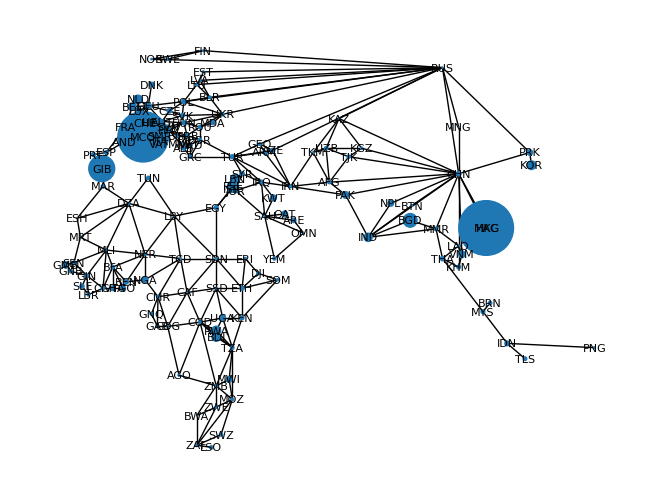

In [5]:
def visualize_nx_graph(graph: nx.Graph, data: pd.DataFrame):
    initial_pos = {node: (data.loc[node, 'x'], data.loc[node, 'y']) for node in graph.nodes}

    node_sizes = [data.loc[node, 'value'] for node in graph.nodes]
    nx.draw(G, pos=initial_pos, with_labels=True, node_size=node_sizes,  font_size=8)
    # node_color='skyblue', edge_color='black',

    plt.axis("off")
    plt.show()

visualize_nx_graph(G, data)

In [ ]:
def visualize_with_pyvis_from_nx(graph: nx, display: bool = False):
    nt = net.Network(notebook=display, directed=False)
    if display:
        nt.prep_notebook()
    
    nt.from_nx(graph, show_edge_weights=False, edge_scaling=True)

    nt.toggle_physics(True)
    if display:
        return nt.show('nx.html')
    else:
        nt.show_buttons()
        print("Generating html file.")
        nt.generate_html(name="nx.html", local=True, notebook=True)
        return nt

In [ ]:
import math


def visualize_with_pyvis_from_df(data: pd.DataFrame, edges: pd.DataFrame, display: bool = False):
    nt = net.Network(notebook=True, directed=False, cdn_resources='in_line')
    
    for d in data.index:
        node_size = math.sqrt(data.loc[d, 'value'] / (2 * math.pi)) * 2
        #node_size = data.loc[d, 'value']
        # value attribut is used by visjs for auto scaling, so exact ratios get lost
        nt.add_node(d, borderWidth=0, shape="circle", size=node_size, mass=data.loc[d, 'value'], x=data.loc[d, 'x'], y=data.loc[d, 'y'])
    for e0, e1 in list(zip(edges['node_0'].tolist(), edges['node_1'].tolist())):
        nt.add_edge(e0, e1)

    nt.options.edges.smooth.enabled = False
    nt.options.interaction.zoomView = False
    nt.options.interaction.dragView = False
    nt.options.interaction.navigationButtons = True
    
    nt.barnes_hut(gravity=-900, central_gravity=4, spring_length=0.01, spring_strength=0.1, damping=0.5, overlap=0.1)
    if not display:
        nt.show_buttons(filter_=['physics'])
        print("Generating html file. nx1.html")
        nt.generate_html(name="nx1.html", notebook=False)

    nt.prep_notebook()
    return nt.show('nx1.html')

visualize_with_pyvis_from_df(data, edges, display=False)

In der Browserconsole dann über folgende Eingabe die Koordinaten erhalten:
```js
function calc_radius(node_idx) {
    boundingBox = network.getBoundingBox(node_idx)
    return (boundingBox.right - boundingBox.left) / 4.
}

var output = "";
var idx = 0
for (p in network.getPositions()) {
    pos = network.getPosition(p)
    output += pos.x.toFixed(1) + " " + pos.y.toFixed(1) + " " + calc_radius(p) + " " + p + " " + idx + "\n";
    idx++;
}
console.log(output)
```